In [3]:
import pandas as pd
import os
import git


def get_git_root():
    try:
        # Create a GitPython Repo object
        repo = git.Repo(search_parent_directories=True)

        # Get the absolute path of the root folder
        git_root = repo.git.rev_parse("--show-toplevel")

        return git_root
    except git.InvalidGitRepositoryError:
        # Handle the case where the current directory is not a Git repository
        print("Not a Git repository or an error occurred.")
        return None

# Get the root folder of the Git repository
root_folder = get_git_root()
# load CSV file from dataset dir

dataset_processed_dir=os.path.join(root_folder,"data/processed")
dataset_processed_file="processed.csv"
dataset_processed_file_path=os.path.join(dataset_processed_dir,dataset_processed_file)

df = pd.read_csv(dataset_processed_file_path)
df.head()
df.shape

(1462, 19)

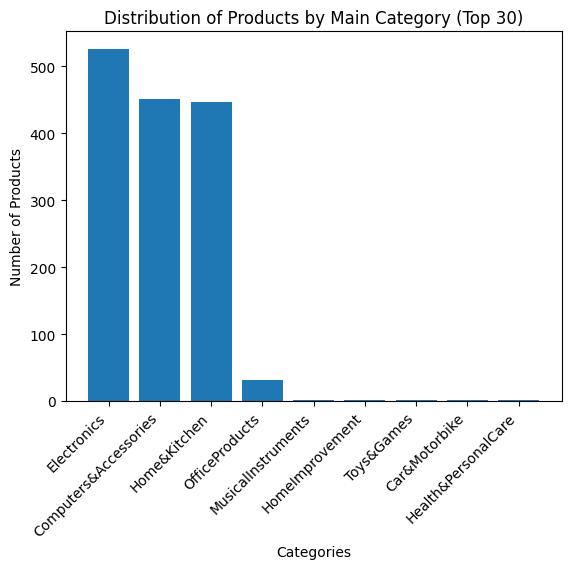

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


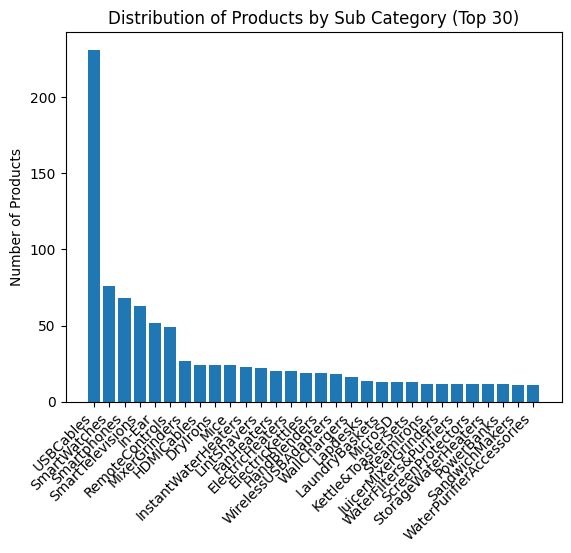

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 231
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

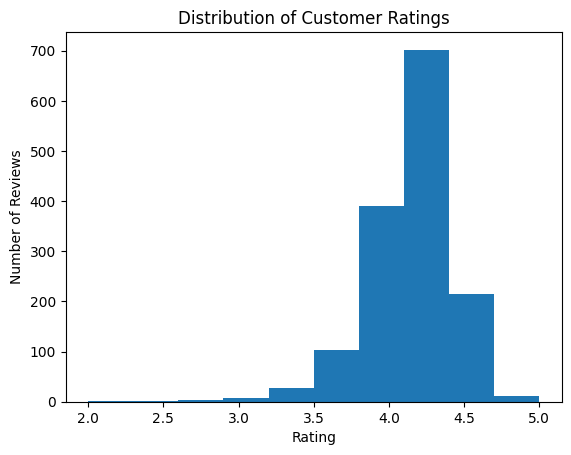

  Number of Reviews  count
0               4-5    928
1               3-4    525
2               2-3      8
3               1-2      1
4               0-1      0
           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749


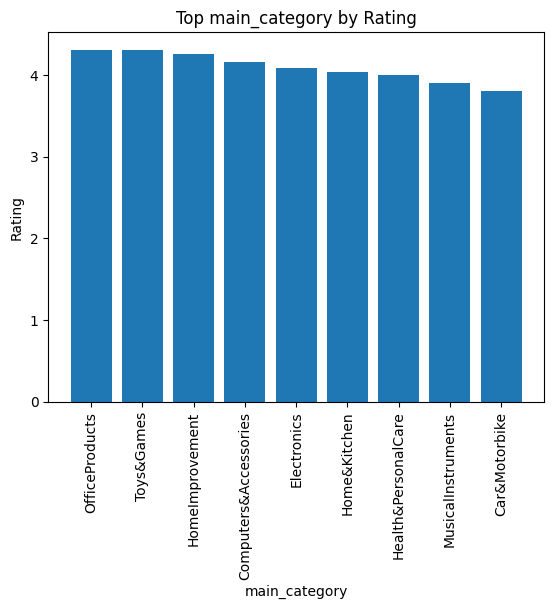

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


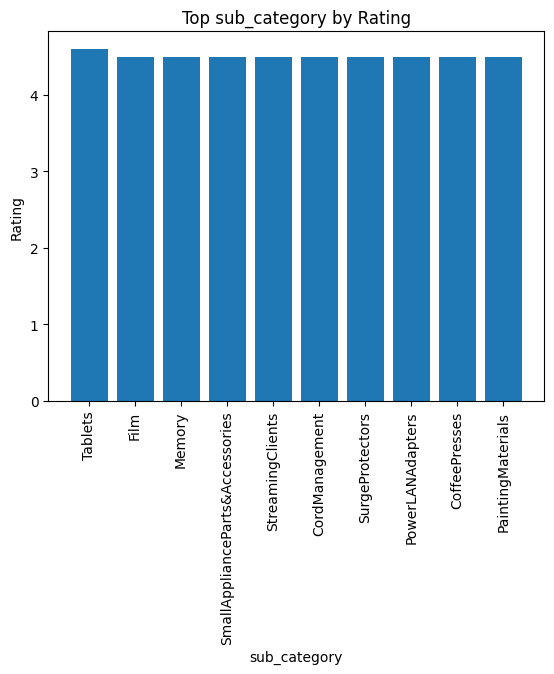

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


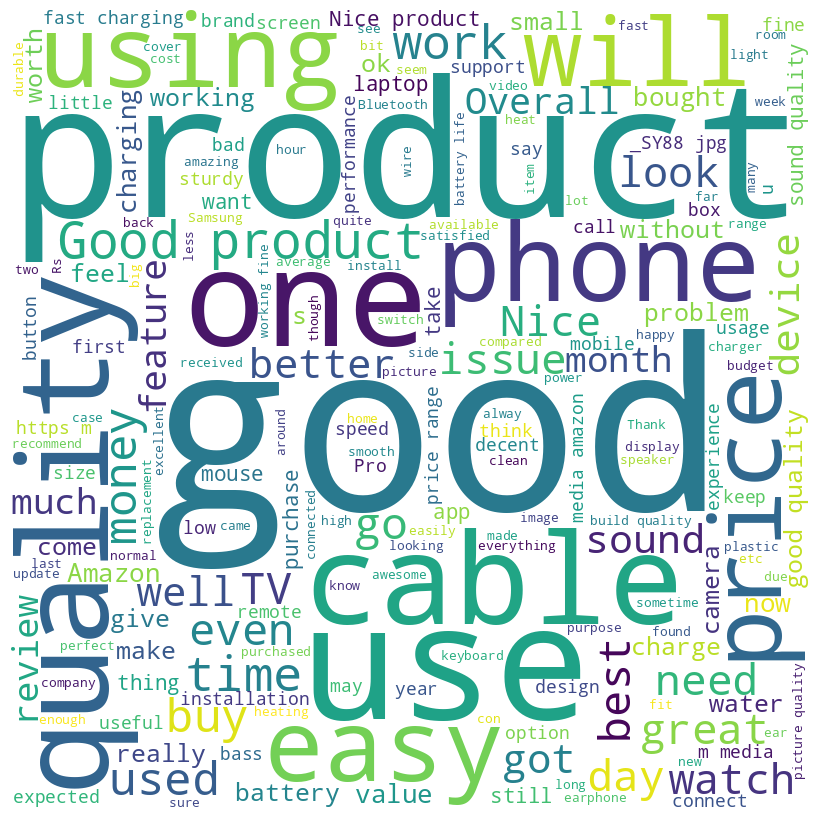

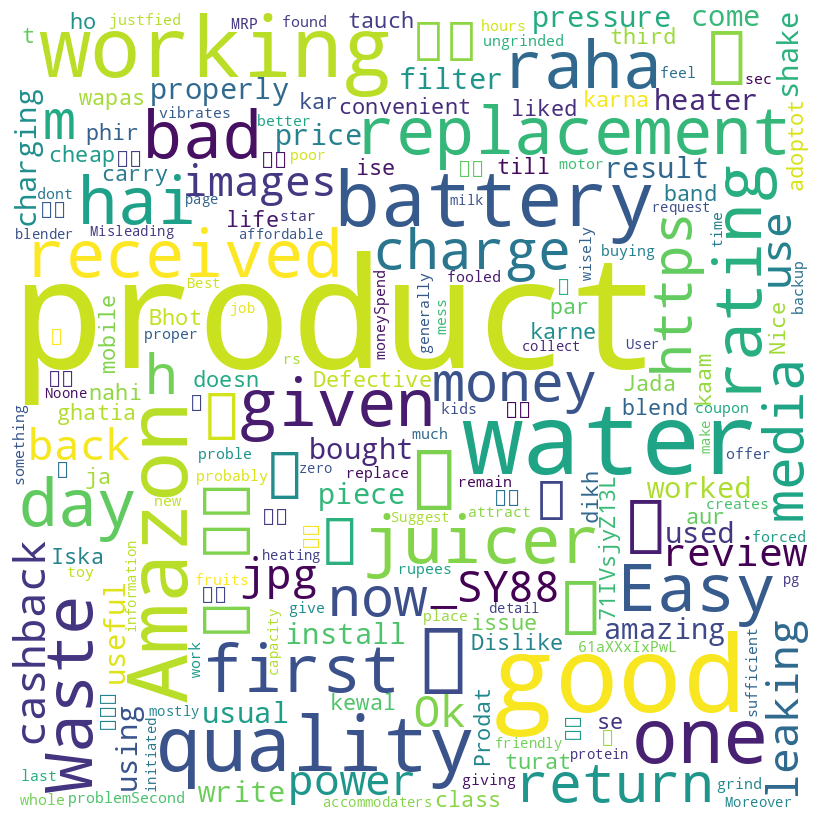

In [2]:
#Data Analysis (EDA) & Data visualization
'''
1 Analyze the distribution of products by category using a bar plot.
2 Analyze the distribution of customer ratings using a histogram.
3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
'''

import matplotlib.pyplot as plt
from wordcloud import WordCloud

figures_dir=os.path.join(root_folder,"reports/figures")

#1
# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(main_category_counts.index, main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xlabel('Categories')
plt.xticks(rotation=45, ha='right') 
plt.savefig(os.path.join(figures_dir, 'main_category_product_distribution.png'))
plt.show()

# Top 30 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))


# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
plt.bar(sub_category_counts.index, sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(rotation=45, ha='right') # hide X-axis labels
plt.savefig(os.path.join(figures_dir, 'last_category_product_distribution.png'))
plt.show()

# Top 30 sub categories 
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))


# 2 Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.savefig(os.path.join(figures_dir, 'customer_rating_distribution.png'))
plt.show()

#Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().reset_index().sort_index().rename(columns={'index': 'Cluster', 'cluster': 'Number of Reviews'})
print(table)

# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()
print(top.head())
# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.savefig(os.path.join(figures_dir, 'top_main_category_product_distribution.png'))
# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)


# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.savefig(os.path.join(figures_dir, 'top_sub_category_product_distribution.png'))
# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)



# 3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df['review_content'].dropna().values)
'''
The code generates a word cloud based on the reviews text in the dataset, 
allowing us to visually analyze the most common words used in the reviews
'''
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig(os.path.join(figures_dir, 'review_word_analaysis.png'))
plt.show()


# Filter the dataframe to include only products with a rating lower than 2
low_rating_df = df[df['rating'] < 3.0]

# Create a string of all the reviews for these products
reviews_text = ' '.join(low_rating_df['review_content'].dropna().values)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig(os.path.join(figures_dir, 'review_negative_word_analaysis.png'))
plt.show()

